# 1. Algorithmes de tirage de plus court chemin

## 1.1 Tirage avec longueur contrainte

In [1]:
%run ../code_python/Algo_long_v2.py

In [2]:
Dieppe = loadVille("dieppe")
print(Dieppe)

MultiDiGraph with 1121 nodes and 2503 edges


In [3]:
dieppe = Preprocessing_Graph_long_v2(Dieppe)

In [4]:
chemin = Uniforme_PCC_long_v2(dieppe, l_min = 30, l_max = 60)
len(chemin)

55

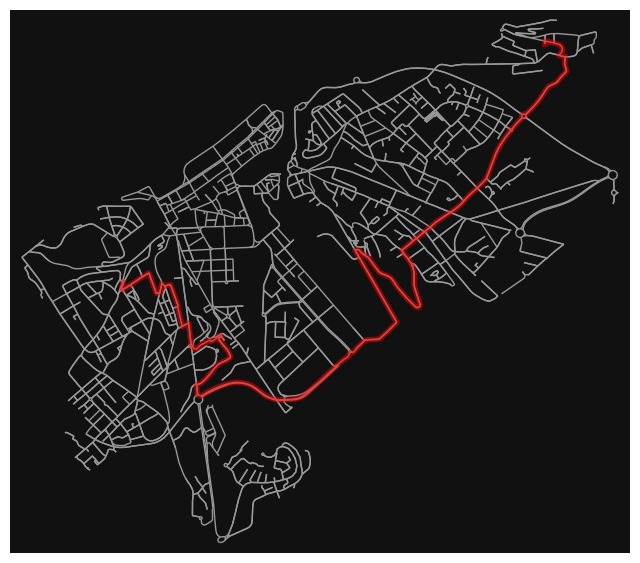

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph_route(Dieppe, chemin, orig_dest_size=0, node_size=0)

## 1.2. Tirage dans des graphes à poids

On tire des $\epsilon$-préfixes plus courts chemins.
Si on part du noeud $(dep)$, on s'autorise à prendre l'arête $(i) \to (j)$ si et seulement si
$w((i) \to (j)) \le (1 + \epsilon).(dist(dep,j) - dist(dep,i))$

In [6]:
%run ../code_python/Algo_poids_v1.py

In [7]:
Palaiseau = loadVille("palaiseau")
print(Palaiseau)

MultiDiGraph with 683 nodes and 1499 edges


In [8]:
epsilon = 0.3
palaiseau = Preprocessing_Graph_poids_v1(Palaiseau, epsilon = epsilon)

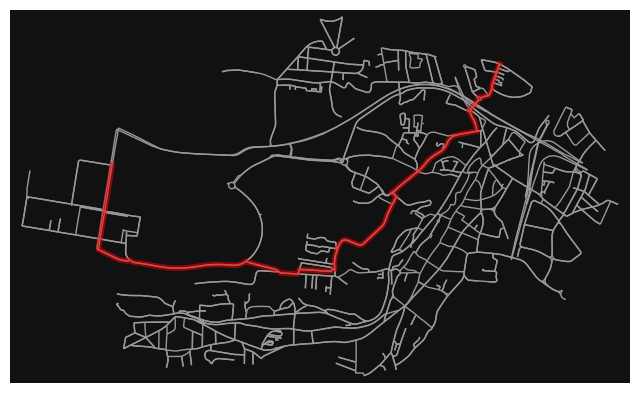

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [44]:
chemin = Uniforme_ePCC_v1(palaiseau)
ox.plot_graph_route(Palaiseau, chemin, orig_dest_size=0, node_size=0)

In [45]:
depart,arrivee = chemin[0],chemin[-1]
dist = nx.shortest_path_length(Palaiseau, source = depart, target = arrivee, weight = "length")
longueur = mesure_chemin(Palaiseau,chemin)

print(f"Distance entre départ et arrivée = {dist}")
print(f"Distance maximale d'un ePCC = {dist*(1 + epsilon)}")
print(f"Longueur du chemin = {longueur}")

Distance entre départ et arrivée = 5789.000000000001
Distance maximale d'un ePCC = 7525.700000000002
Longueur du chemin = 5844.214


## 1.3. Tirage dans les graphes à poids avec distance contrainte

On tire des $\epsilon$-préfixes plus courts chemins.
On demande à ce que $dist(depart,arrivee) \in [L_{min}, L_{max}]$. On tire ensuite un $\epsilon$-préfixe plus court chemin entre $(depart)$ et $(arrivee)$.

In [9]:
%run ../code_python/Algo_poids_long_v1.py

In [10]:
Cabourg = loadVille("cabourg")
print(Cabourg)

MultiDiGraph with 372 nodes and 902 edges


In [11]:
epsilon = 0.3
cabourg = Preprocessing_Graph_poids_long_v1(Cabourg, epsilon = epsilon)

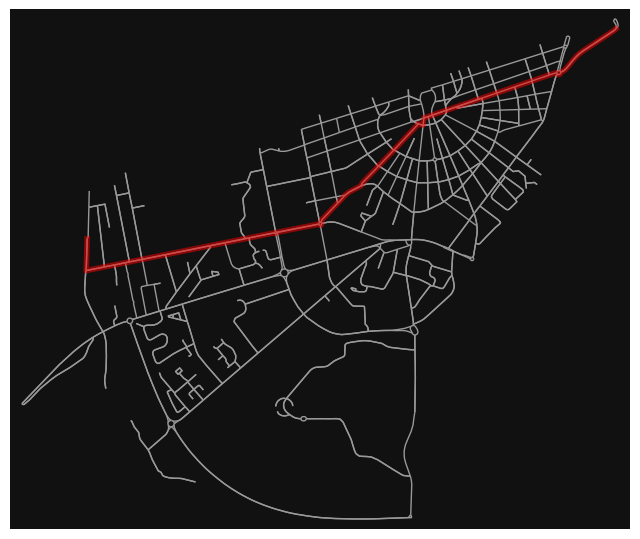

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [18]:
chemin = Uniforme_ePCC_long_v1(cabourg, l_min = 3000, l_max = 4000)
ox.plot_graph_route(Cabourg, chemin, orig_dest_size=0, node_size=0)

In [19]:
depart,arrivee = chemin[0],chemin[-1]
dist = nx.shortest_path_length(Cabourg, source = depart, target = arrivee, weight = "length")
longueur = mesure_chemin(Cabourg,chemin)

print(f"Distance entre départ et arrivée = {dist}")
print(f"Distance maximale d'un ePCC = {dist*(1 + epsilon)}")
print(f"Longueur du chemin = {longueur}")

Distance entre départ et arrivée = 3278.5140000000006
Distance maximale d'un ePCC = 4262.068200000001
Longueur du chemin = 3281.25


## 1.4. Comparaison des complexités

In [57]:
%run ../code_python/Complexite_operations.py

In [58]:
echant_ER = echantillon_erdos_renyi()

In [59]:
data_ER_classique = calcul_donnees(c_Preprocessing_Graph_v3, c_Uniforme_PCC_v3, echant_ER)
data_ER_long = calcul_donnees(c_Preprocessing_Graph_long_v2, c_Uniforme_PCC_long_v2, echant_ER)
data_ER_poids = calcul_donnees(c_Preprocessing_Graph_poids_v1, c_Uniforme_ePCC_v1, echant_ER)
data_ER_poids_long = calcul_donnees(c_Preprocessing_Graph_poids_long_v1, c_Uniforme_ePCC_long_v1, echant_ER)

In [60]:
data = [data_ER_classique, data_ER_long, data_ER_poids, data_ER_poids_long]

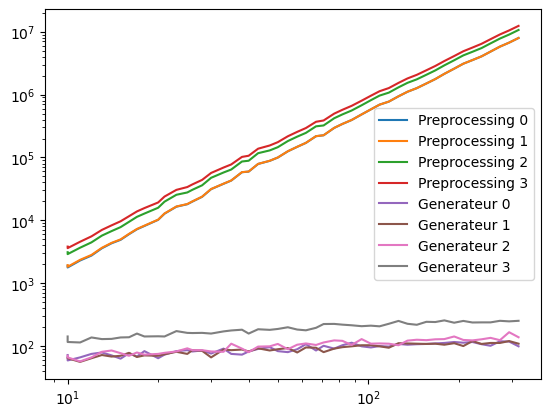

In [61]:
complexite_comparaison_donnees(data)

# 2. Distance moyenne VS Longueur moyenne d'un PCC

In [20]:
%run ../code_python/comparaison_distance_longueur_moyenne.py

## 2.1. Dans une grille

### 1.1.1. Grille 2 $\times$ n

Pour une grille de taille $2 \times n$ le calcul théorique donne :
- distance moyenne entre deux noeuds du graphe : $d_{moy} \sim \frac{n}{3}$
- longueur moyenne d'un plus court chemin du graphe : $l_{moy} \sim \frac{n}{2}$
- rapport des deux grandeurs : $\frac{l_{moy}}{d_{moy}} \sim \frac{3}{2}$

In [69]:
echant_2xN = echantillon_grille(dimensions = [(2,floor(n)) for n in np.linspace(1,100, 50)])
data_2xN = calcul_longueur_et_distance_moyenne(echant_2xN)

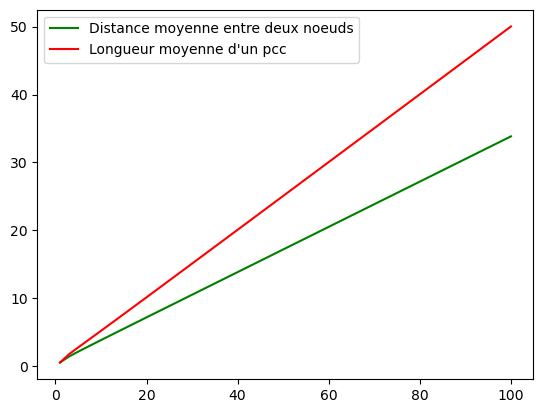

In [71]:
compare_dist_long(data_2xN, abcisse = [floor(n) for n in np.linspace(1,100, 50)])

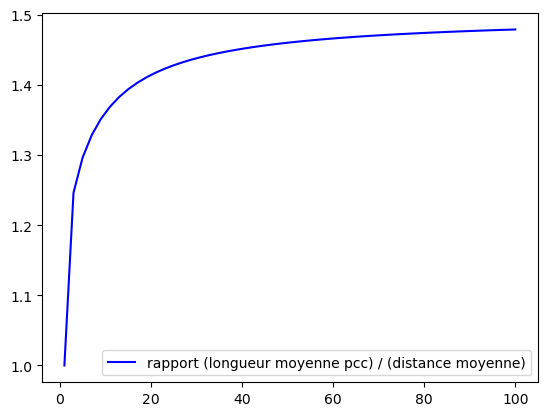

In [72]:
rapport_long_sur_dist(data_2xN, abcisse = [floor(n) for n in np.linspace(1,100, 50)])

### 1.1.2. Grille m $\times$ n

Pour une grille de taille $m \times n$ où $m$ est une constante fixée et $n \to +\infty$, le calcul théorique donne :
- distance moyenne entre deux noeuds du graphe : $d_{moy} \sim \frac{n}{3}$
- longueur moyenne d'un plus court chemin du graphe : $l_{moy} \sim \frac{mn}{m+2}$
- rapport des deux grandeurs : $\frac{l_{moy}}{d_{moy}} \sim \frac{3m}{m+2}$

In [73]:
m = 6
rapport = 3*m/(m+2)
rapport

2.25

In [74]:
echant_MxN = echantillon_grille(dimensions = [(m,n) for n in range(1,50)])
data_MxN = calcul_longueur_et_distance_moyenne(echant_MxN)

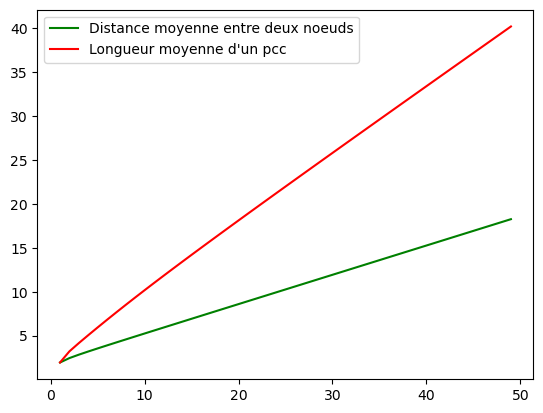

In [76]:
compare_dist_long(data_MxN, abcisse = [n for n in range(1,50)])

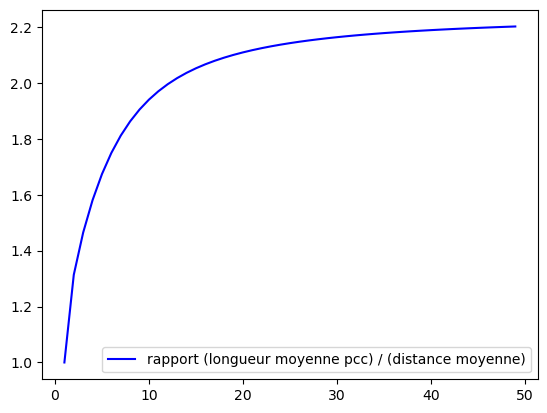

In [77]:
rapport_long_sur_dist(data_MxN, abcisse = [n for n in range(1,50)])

## 2.2. Dans un graphe aléatoire

In [78]:
echant_ER = echantillon_erdos_renyi()
data_ER = calcul_longueur_et_distance_moyenne(echant_ER)

La longueur moyenne théorique d'un chemin (pas forcément plus court chemin!) est : 
- $L_{ER} = \frac{\log(N) - \gamma}{\log(\langle deg \rangle)} + \frac{1}{2}$ pour les Erdos Renyi

In [81]:
gamma = 0.5772156649
valeur_theo_ER = [(log(len(G)) - gamma)/(log(degre_moyen(G))) + 0.5 for G in echant_ER]

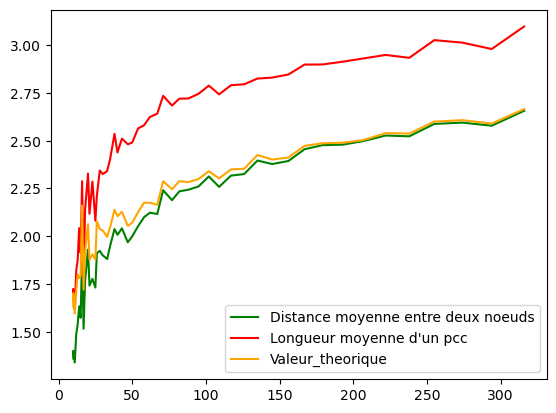

In [82]:
compare_dist_long(data_ER, valeur_theorique = valeur_theo_ER)

### Erdos Renyi en fonction de p

In [84]:
# Echantillon de nb_points graphes de n noeuds avec proba variant entre p_min et p_max
echant_ER_p, proba = echantillon_erdos_renyi_p(0.01,1, nb_points = 50, n = 100)
data_ER_p = calcul_longueur_et_distance_moyenne(echant_ER_p)

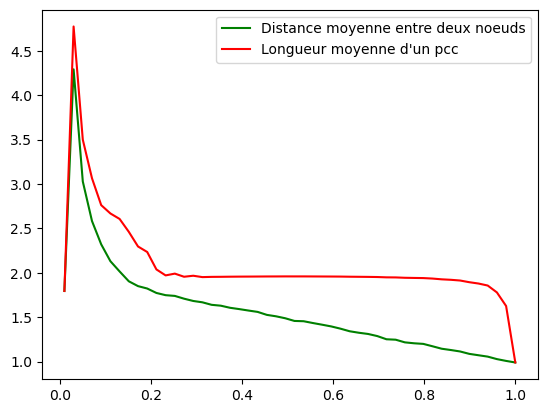

In [85]:
compare_dist_long(data_ER_p, abcisse = proba)

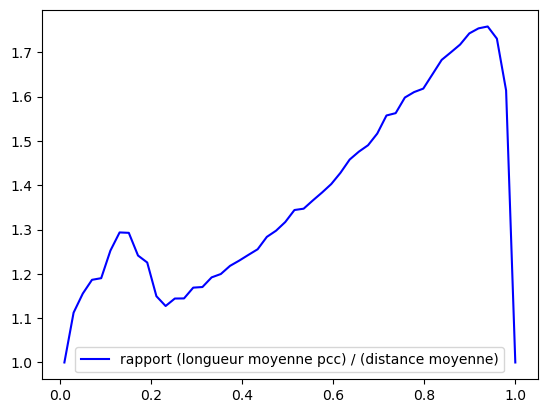

In [86]:
rapport_long_sur_dist(data_ER_p, abcisse = proba)

# 3. DAG de Dijkstra

- Equation fonctionnelle de la fonction génératrice

Voir présentations Sage:
- $dd_n \sim C 2^{\frac{n^2}{4}}$ $\Longrightarrow$ voir serie_gen_ddn
- $d_n = 2^{\binom{n+1}{2}} e^{-an} f(n)$ $\Longrightarrow$ voir serie_gen
- Série génératrice à poids et rayon de convergence non nul. $\Longrightarrow$ voir serie_gen_poids